# loading evidence of each models and calculating Bayes Factor

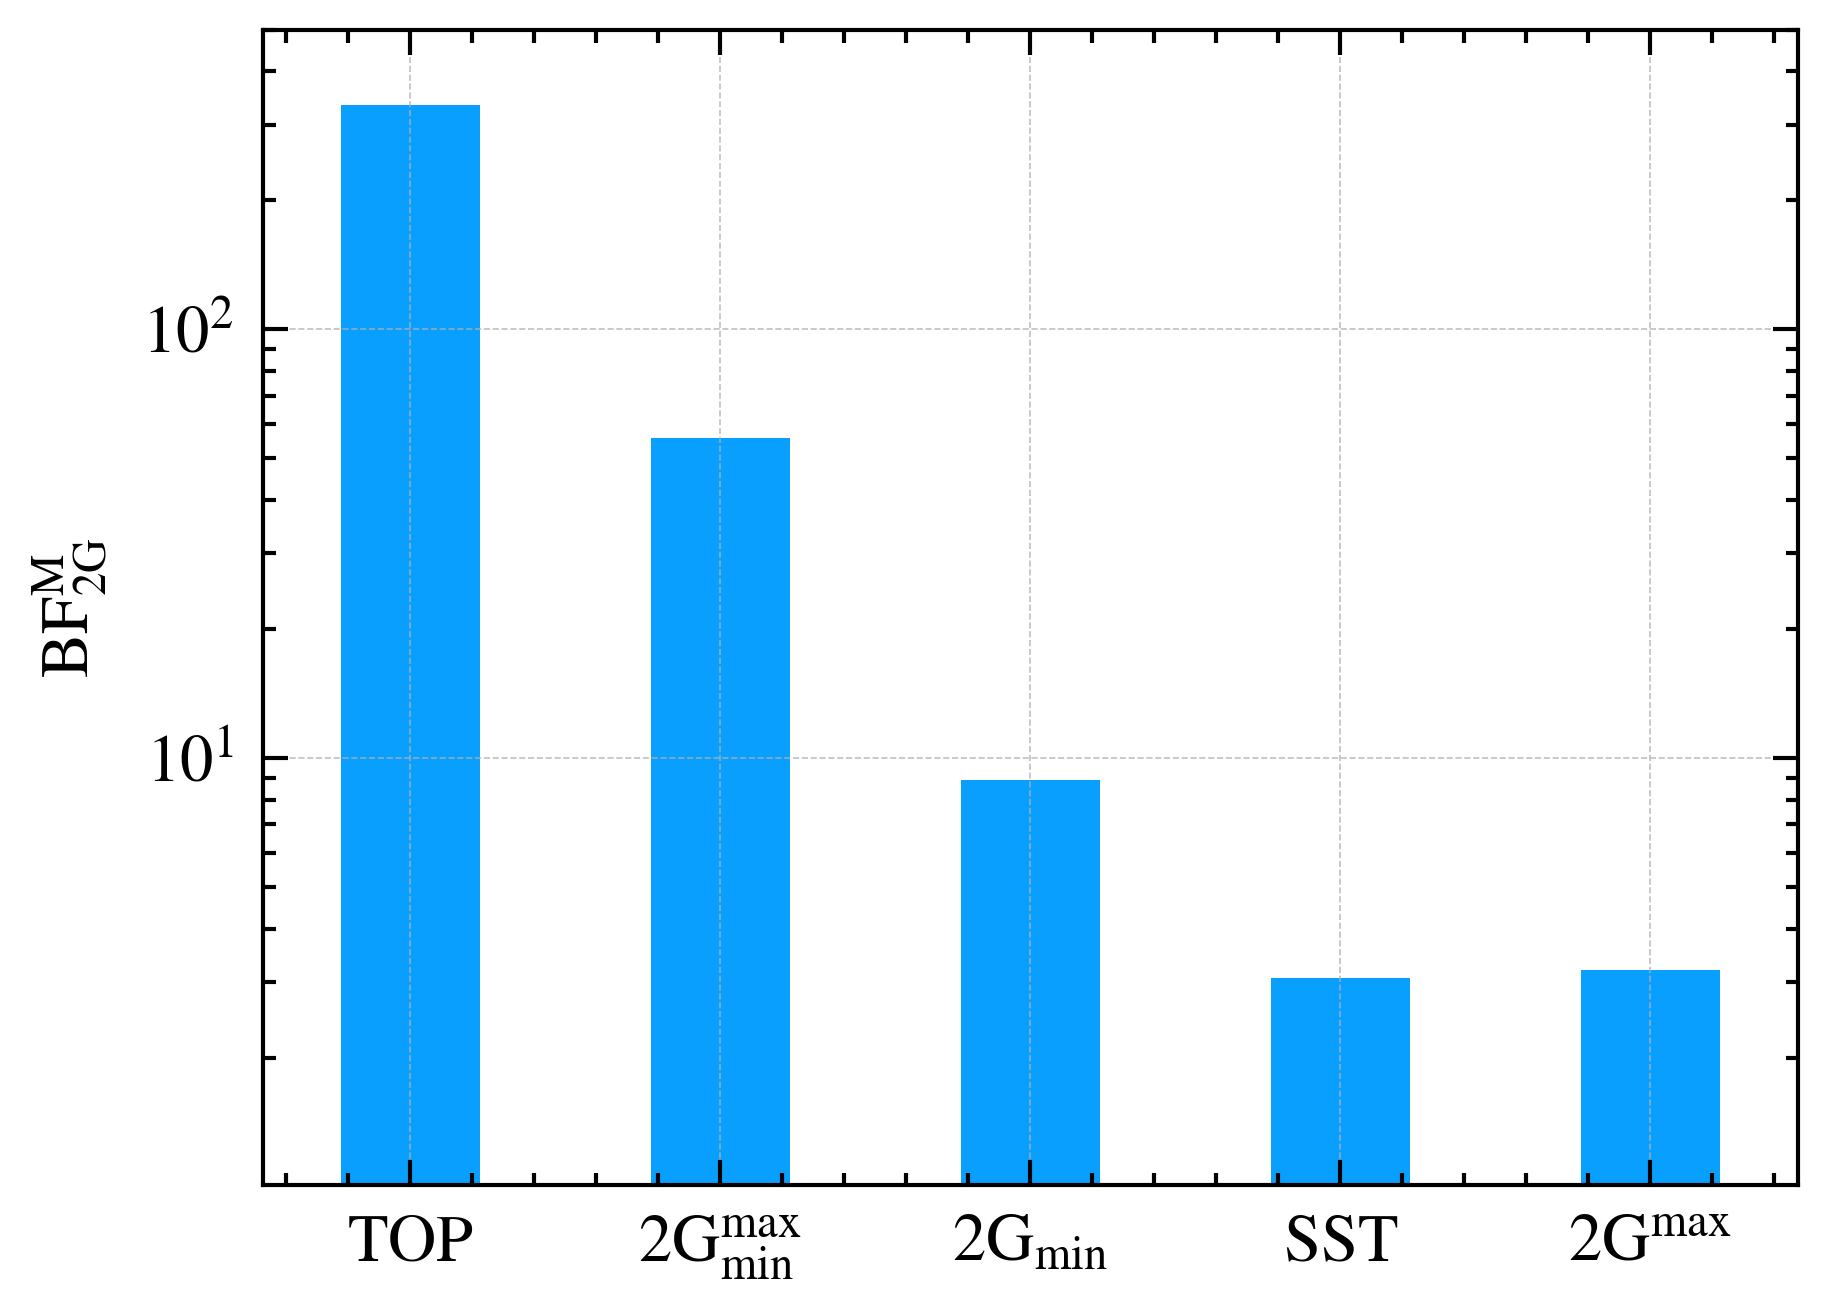

In [6]:
import bilby
import pandas as pd
import os
import glob
import numpy as np
from scipy import interpolate
import utilizes_plot
parent_dir_path=os.path.abspath( os.path.join(os.getcwd(),'..')) 

mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34','ana_radio']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$',r'$\rm{ANA_{radio}}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########

main_direct=parent_dir_path+'/NSmassData/posteriors/'

evi_index=[0,1,2,3,4,5,6,7]
evidence_data={}
for j in evi_index:
    evidence_data['evi_'+str(mrms_data_label[j])]=\
    pd.read_csv(main_direct + '{}/{}_evidence.csv'.format(mrms_data_label[j],mrms_data_label[j]) , index_col=None, header=None)

bf_m_2g={}
for j in [0,1,2]:
    bf_tem=evidence_data['evi_'+str(mrms_data_label[j])][1][[0,4,8,7,10]]\
    -evidence_data['evi_'+str(mrms_data_label[j])][1][11]
    bf_m_2g['bf_'+str(mrms_data_label[j])] = bf_tem

    
import corner.corner
import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
#plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

a=0
b=1
c=2
index=[r'$\rm{TOP}$',  r'$\rm{2G^{max}_{min}}$',r'$\rm{SST}$',r'$\rm{2G_{min}}$',r'$\rm{2G^{max}}$'] #top pow 2gcm  sst  2gc
df1 = pd.DataFrame( {#r'$\rm{OBS}$': np.exp((bf_m_2g['bf_'+str(mrms_data_label[a])]).values), 
                   r'$\rm{ANA}$':  np.exp((bf_m_2g['bf_'+str(mrms_data_label[b])]).values)},  
                   #r'$\rm{PHE}$':  np.exp((bf_m_2g['bf_'+str(mrms_data_label[c])]).values)},
                   index=index)
df11=df1.reindex([r'$\rm{TOP}$',  r'$\rm{2G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{2G^{max}}$'])
ax = df11.plot.bar(width=0.45,color= ['#089FFF','#ff7f0e','grey'])
ax.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)
ax.get_legend().remove()
plt.ylim(1.01,0.5*10**3)
plt.yscale('log')
plt.xticks(rotation=0 ) 
plt.ylabel(r'$\rm{BF^{M}_{2G}}$')
plt.savefig(parent_dir_path+'/figures/fig2_up.jpg')

# loading evidence data and generating extended Tab3

In [2]:
bf_m_u={}
bf_m_u_array=np.zeros((15,8))
for j in evi_index:
    bf_tem=evidence_data['evi_'+str(mrms_data_label[j])][1][[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15]]\
    -evidence_data['evi_'+str(mrms_data_label[j])][1][16]
    bf_m_u['bf_'+str(mrms_data_label[j])] = bf_tem 
    bf_m_u_array[:,j]=bf_tem 

In [3]:
evidence_data

{'evi_ns_obs':                           0          1
 0               turn_on_pow  58.610177
 1           turn_on_pow_fix  57.681697
 2             turn_on_pow_G  56.593369
 3                       pow  56.133104
 4                        2G  56.032573
 5   turn_on_pow_G_fixed_max  54.776201
 6                         G  53.931754
 7              2G_fixed_max  53.932685
 8                       sst  53.727280
 9               G_fixed_max  53.611682
 10             2G_fixed_min  52.602263
 11         2G_fixed_max_min  52.262297
 12                     logu  50.992797
 13         3G_fixed_max_min  51.036804
 14                  lognorm  47.295109
 15                    gamma  45.929501
 16                        U  45.448877
 17          G_fixed_max_min  41.547768,
 'evi_ana_corrected_mrms_87':                           0          1
 0               turn_on_pow  62.326233
 1           turn_on_pow_fix  61.694323
 2             turn_on_pow_G  60.645042
 3                       pow  61.621

In [4]:
evis=evidence_data

In [5]:
pd.DataFrame(np.around(bf_m_u_array,decimals=1), index = (evis['evi_'+str(mrms_data_label[0])][0][[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15]]).values, columns=data_name_labes)

,$\rm{OBS}$,$\rm{ANA}$,$\rm{PHE}$,$\rm{ANA_{m_r}}$,$\rm{PHE_{m_r}}$,$\rm{m_r}$,$\rm{m_s}$,$\rm{ANA_{radio}}$
turn_on_pow,13.2,16.1,13.1,8.7,6.3,6.2,4.4,22.1
turn_on_pow_fix,12.2,15.4,12.2,8.5,5.4,5.1,4.5,22.1
turn_on_pow_G,11.1,14.4,12.4,7.0,5.1,4.0,2.4,19.7
2G,10.6,14.3,11.9,7.7,5.2,4.2,1.7,17.7
turn_on_pow_G_fixed_max,9.3,12.3,9.2,4.9,2.6,2.5,2.0,19.5
G,8.5,9.9,7.5,4.2,2.8,2.5,1.2,15.3
2G_fixed_max,8.5,12.4,9.4,5.7,3.1,2.4,0.6,16.5
sst,8.3,11.4,8.5,5.1,2.5,2.6,1.3,17.1
G_fixed_max,8.2,9.6,7.1,4.0,2.3,2.1,0.8,14.9
2G_fixed_min,7.2,11.4,8.3,5.6,2.6,0.4,-0.2,16.4
